In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np
import os
import datetime
%matplotlib inline

In [3]:
print(tf.__version__)

2.6.0


In [3]:
imagePaths = "/content/drive/MyDrive/tree_dataset/train"

In [4]:
test_path="/content/drive/MyDrive/tree_dataset/test"

In [5]:
batch_size=32
img_height = 255
img_width = 255

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  imagePaths,
  #color_mode='grayscale',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1584 files belonging to 5 classes.
Using 1268 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  imagePaths, 
  #color_mode='grayscale',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1584 files belonging to 5 classes.
Using 316 files for validation.


In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 411 files belonging to 5 classes.


In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 255, 255, 3)
(32,)


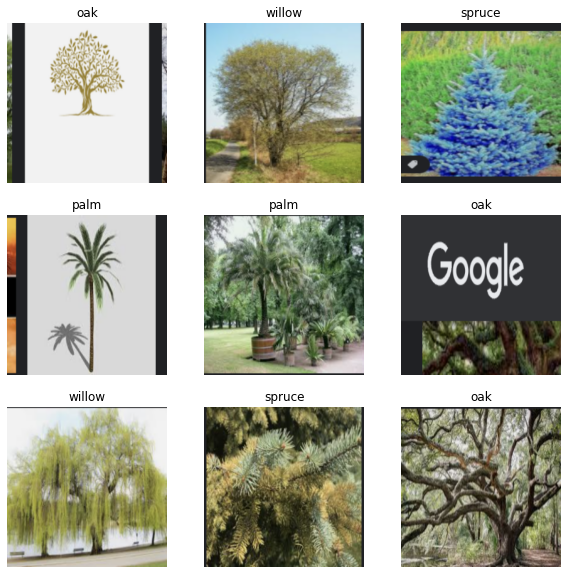

In [ ]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Model

In [9]:
base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
#    layer.trainable = False


# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
def get_early_stopping():
    
    return tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [11]:
def get_checkpoint_best_only():
    
    checkpoint_best_path= 'checkpoints_best_only'
    checkpoint_best= ModelCheckpoint(filepath=checkpoint_best_path,
                           frequency='epoch',
                           save_weights_only=False,
                           monitor='val_accuracy',
                           save_best_only=True,
                           verbose=1)
    return checkpoint_best

In [12]:
checkpoint_best_only = get_checkpoint_best_only()
early_stopping = get_early_stopping()
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#callbacks = [checkpoint_best_only, early_stopping, tensorboard_callback]
callbacks = [checkpoint_best_only, tensorboard_callback]

In [13]:
history = model.fit(train_ds, validation_data=val_ds, epochs=30,callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/30
40/40 [==============================] - 59s 1s/step - loss: 1.7420 - accuracy: 0.5095 - val_loss: 8606.8945 - val_accuracy: 0.1930

Epoch 00001: val_accuracy improved from -inf to 0.19304, saving model to checkpoints_best_only
INFO:tensorflow:Assets written to: checkpoints_best_only/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
40/40 [==============================] - 38s 937ms/step - loss: 1.0089 - accuracy: 0.6270 - val_loss: 35.5881 - val_accuracy: 0.2310

Epoch 00002: val_accuracy improved from 0.19304 to 0.23101, saving model to checkpoints_best_only
INFO:tensorflow:Assets written to: checkpoints_best_only/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/30
40/40 [==============================] - 38s 931ms/step - loss: 0.8400 - accuracy: 0.6838 - val_loss: 81.7096 - val_accuracy: 0.2690

Epoch 00003: val_accuracy improved from 0.23101 to 0.26899, saving model to checkpoints_best_only
INFO:tensorflow:Assets written to: checkpoints_best_only/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/30
40/40 [==============================] - 38s 934ms/step - loss: 0.6999 - accuracy: 0.7319 - val_loss: 2.1270 - val_accuracy: 0.4114

Epoch 00004: val_accuracy improved from 0.26899 to 0.41139, saving model to checkpoints_best_only
INFO:tensorflow:Assets written to: checkpoints_best_only/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/30
40/40 [==============================] - 38s 934ms/step - loss: 0.5876 - accuracy: 0.7650 - val_loss: 35.5976 - val_accuracy: 0.3259

Epoch 00005: val_accuracy did not improve from 0.41139
Epoch 6/30
40/40 [==============================] - 38s 934ms/step - loss: 0.5792 - accuracy: 0.7681 - val_loss: 4.4055 - val_accuracy: 0.5285

Epoch 00006: val_accuracy improved from 0.41139 to 0.52848, saving model to checkpoints_best_only
INFO:tensorflow:Assets written to: checkpoints_best_only/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/30
40/40 [==============================] - 38s 935ms/step - loss: 0.4032 - accuracy: 0.8502 - val_loss: 1.2534 - val_accuracy: 0.6329

Epoch 00007: val_accuracy improved from 0.52848 to 0.63291, saving model to checkpoints_best_only
INFO:tensorflow:Assets written to: checkpoints_best_only/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/30
40/40 [==============================] - 38s 930ms/step - loss: 0.4492 - accuracy: 0.8352 - val_loss: 1.5205 - val_accuracy: 0.5981

Epoch 00008: val_accuracy did not improve from 0.63291
Epoch 9/30
40/40 [==============================] - 38s 936ms/step - loss: 0.3704 - accuracy: 0.8596 - val_loss: 2.8552 - val_accuracy: 0.3766

Epoch 00009: val_accuracy did not improve from 0.63291
Epoch 10/30
40/40 [==============================] - 38s 933ms/step - loss: 0.3050 - accuracy: 0.8849 - val_loss: 3.8238 - val_accuracy: 0.4241

Epoch 00010: val_accuracy did not improve from 0.63291
Epoch 11/30
40/40 [==============================] - 38s 928ms/step - loss: 0.2770 - accuracy: 0.9022 - val_loss: 3.7313 - val_accuracy: 0.4778

Epoch 00011: val_accuracy did not improve from 0.63291
Epoch 12/30
40/40 [==============================] - 38s 929ms/step - loss: 0.2816 - accuracy: 0.9046 - val_loss: 2.2853 - val_accuracy: 0.5222

Epoch 00012: val_accuracy did not improve from 0.63291
Ep

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 22/30
40/40 [==============================] - 38s 930ms/step - loss: 0.1753 - accuracy: 0.9393 - val_loss: 1.7211 - val_accuracy: 0.6013

Epoch 00022: val_accuracy did not improve from 0.65506
Epoch 23/30
40/40 [==============================] - 38s 927ms/step - loss: 0.0964 - accuracy: 0.9653 - val_loss: 3.5210 - val_accuracy: 0.4146

Epoch 00023: val_accuracy did not improve from 0.65506
Epoch 24/30
40/40 [==============================] - 38s 932ms/step - loss: 0.0772 - accuracy: 0.9763 - val_loss: 2.1421 - val_accuracy: 0.6266

Epoch 00024: val_accuracy did not improve from 0.65506
Epoch 25/30
40/40 [==============================] - 38s 934ms/step - loss: 0.0714 - accuracy: 0.9771 - val_loss: 1.3972 - val_accuracy: 0.6677

Epoch 00025: val_accuracy improved from 0.65506 to 0.66772, saving model to checkpoints_best_only
INFO:tensorflow:Assets written to: checkpoints_best_only/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 26/30
40/40 [==============================] - 38s 937ms/step - loss: 0.0382 - accuracy: 0.9874 - val_loss: 2.8541 - val_accuracy: 0.5222

Epoch 00026: val_accuracy did not improve from 0.66772
Epoch 27/30
40/40 [==============================] - 38s 931ms/step - loss: 0.0739 - accuracy: 0.9779 - val_loss: 1.9389 - val_accuracy: 0.5538

Epoch 00027: val_accuracy did not improve from 0.66772
Epoch 28/30
40/40 [==============================] - 40s 972ms/step - loss: 0.0449 - accuracy: 0.9866 - val_loss: 2.2590 - val_accuracy: 0.5791

Epoch 00028: val_accuracy did not improve from 0.66772
Epoch 29/30
40/40 [==============================] - 38s 934ms/step - loss: 0.0392 - accuracy: 0.9913 - val_loss: 2.1014 - val_accuracy: 0.6487

Epoch 00029: val_accuracy did not improve from 0.66772
Epoch 30/30
40/40 [==============================] - 38s 927ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 2.2609 - val_accuracy: 0.6139

Epoch 00030: val_accuracy did not improve from 0.66772


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.save('model.h5')
#model = load_model('path/to/location')

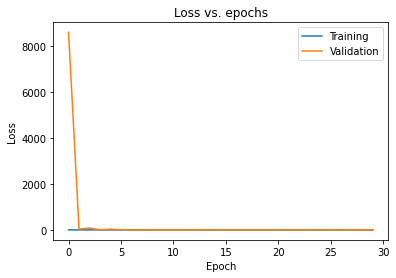

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

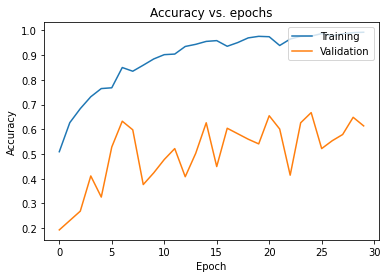

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [17]:
results = model.evaluate(test_ds, verbose=2)

13/13 - 6s - loss: 3.2359 - accuracy: 0.5255


In [18]:
results

[3.235912561416626, 0.525547444820404]

In [34]:
test_image = image.load_img('/content/drive/MyDrive/tree_dataset/test/oak/(362).png', target_size = (255, 255))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [42]:
labels=['oak', 'palm', 'pine', 'spruce', 'willow']

In [36]:
result = model.predict(test_image)

In [37]:
result

array([[9.9887449e-01, 2.6063146e-06, 4.0719414e-07, 2.3618314e-07,
        1.1222789e-03]], dtype=float32)

In [40]:
result = model.predict(test_image)

if max(result[0]) == result[0][0]:
  print(labels[0])


elif max(result[0]) == result[0][1]:
  print(labels[1])

elif max(result[0]) == result[0][2]:
  print(labels[2])

elif max(result[0]) == result[0][3]:
  print(labels[3])

else:
  print(labels[4])


oak


In [43]:
test_image = image.load_img('/content/drive/MyDrive/tree_dataset/test/pine/(313).png', target_size = (255, 255))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if max(result[0]) == result[0][0]:
  print(labels[0])


elif max(result[0]) == result[0][1]:
  print(labels[1])

elif max(result[0]) == result[0][2]:
  print(labels[2])

elif max(result[0]) == result[0][3]:
  print(labels[3])

else:
  print(labels[4])

spruce


In [44]:
test_image = image.load_img('/content/drive/MyDrive/tree_dataset/test/spruce/(329).png', target_size = (255, 255))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if max(result[0]) == result[0][0]:
  print(labels[0])


elif max(result[0]) == result[0][1]:
  print(labels[1])

elif max(result[0]) == result[0][2]:
  print(labels[2])

elif max(result[0]) == result[0][3]:
  print(labels[3])

else:
  print(labels[4])

spruce


In [47]:
test_image = image.load_img('/content/drive/MyDrive/tree_dataset/test/palm/(360).png', target_size = (255, 255))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if max(result[0]) == result[0][0]:
  print(labels[0])


elif max(result[0]) == result[0][1]:
  print(labels[1])

elif max(result[0]) == result[0][2]:
  print(labels[2])

elif max(result[0]) == result[0][3]:
  print(labels[3])

else:
  print(labels[4])

palm
